# Distribution of dataset

## Plot the length of the Audio song

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import json

In [4]:
song_path = '/home/varaudio/Thang/emotion_recognition/data/Audio_Song_Actors_01-24'
song_files = []
for dir in os.listdir(song_path):
    for file in os.listdir(os.path.join(song_path, dir)):
        if file.endswith('.wav'):
            song_files.append(os.path.join(song_path, dir, file))
print(len(song_files))


1012


In [14]:
speech_path = '/home/varaudio/Thang/emotion_recognition/data/Audio_Speech_Actors_01-24'
speech_files = []
for dir in os.listdir(speech_path):
    for file in os.listdir(os.path.join(speech_path, dir)):
        if file.endswith('.wav'):
            speech_files.append(os.path.join(speech_path, dir, file))
print(len(speech_files))

1440


In [15]:
def get_audio_lengths(file_paths):
    """
    Calculate the lengths of audio files.

    Parameters:
    file_paths (list): List of file paths to audio files.

    Returns:
    list: List of audio lengths in seconds.
    """
    lengths = []
    for file_path in file_paths:
        try:
            audio, sr = librosa.load(file_path, sr=None)
            lengths.append(librosa.get_duration(y=audio, sr=sr))
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return lengths

In [16]:

def plot_length_distribution(lengths, song=True):
    """
    Plots the distribution of audio clip lengths.

    Parameters:
    lengths (list or array-like): A list of audio clip lengths.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, kde=True, bins=30, color='blue')
    if song:
        plt.title('Distribution of Song Clip Lengths', fontsize=16)
    else:
        plt.title('Distribution of Speech Clip Lengths', fontsize=16)
    plt.xlabel('Length (seconds)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

1012
1440
Song lengths:  [4.2041875, 4.104104166666667, 5.572229166666666, 4.037375, 5.538875, 4.2375625, 4.137458333333333, 4.604604166666666, 3.9039166666666665, 4.137479166666667, 5.438770833333334, 4.104104166666667, 4.604604166666666, 4.170833333333333, 4.037375, 4.037375, 3.93725, 4.671333333333333, 5.1384791666666665, 4.2709375, 3.8371666666666666, 4.104104166666667, 4.337666666666666, 5.372041666666667, 4.771416666666667, 5.4054166666666665, 4.804791666666667, 4.170833333333333, 4.437770833333333, 5.338666666666667, 5.972645833333333, 4.637979166666667, 4.637979166666667, 4.137458333333333, 4.304291666666667, 4.371020833333334, 4.170833333333333, 4.904895833333334, 3.970625, 6.039375, 4.7047083333333335, 4.004, 6.039354166666667, 5.038354166666666, 4.8048125, 4.304291666666667, 6.339666666666667, 4.838166666666667, 4.5045, 5.372041666666667, 4.5045, 5.338666666666667, 5.405395833333333, 4.5045, 4.671333333333333, 4.537875, 4.637979166666667, 4.637958333333334, 4.137458333333333

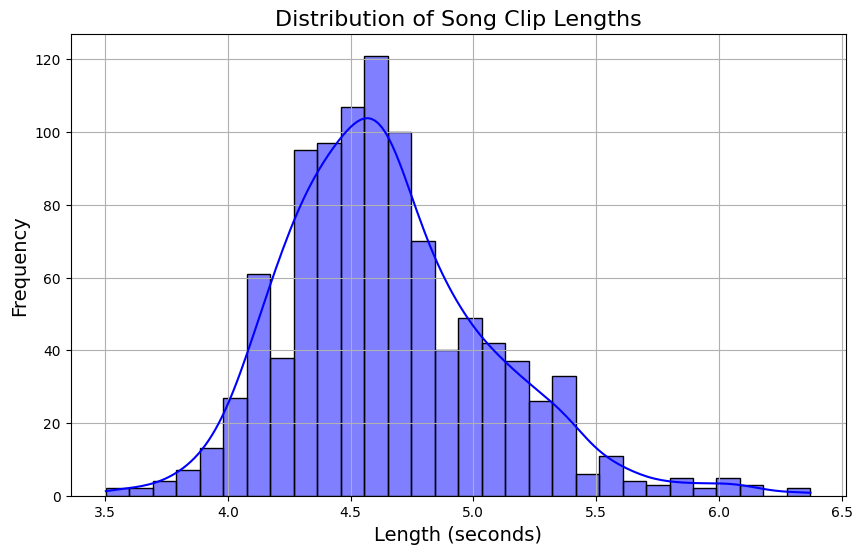

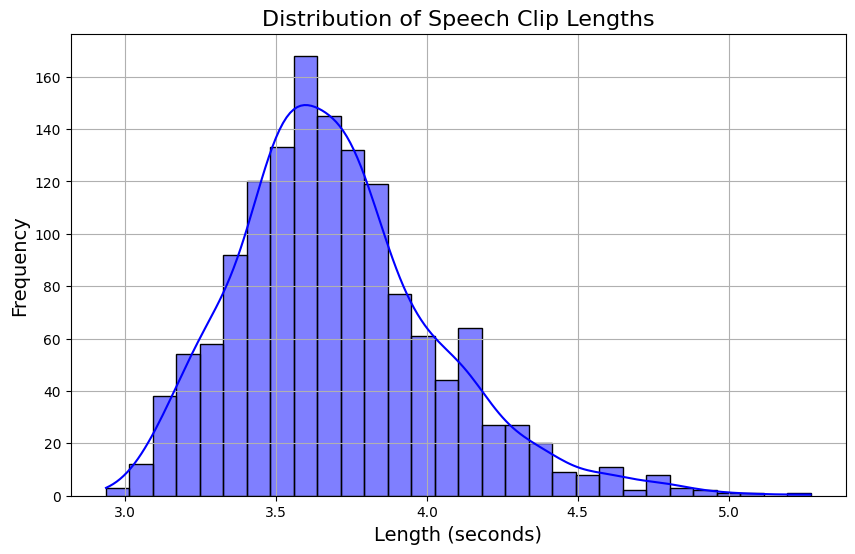

In [18]:
song_lengths = get_audio_lengths(song_files)
speech_lengths = get_audio_lengths(speech_files)
print(len(song_lengths))
print(len(speech_lengths))
print("Song lengths: ", song_lengths)
print("Speech lengths: ", speech_lengths)
plot_length_distribution(song_lengths, song=True)
plot_length_distribution(speech_lengths, song=False)

# Extract labels file

In [24]:
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

statement_map = {
    '01': 'Kids are talking by the door',
    '02': 'Dogs are sitting by the door'
}

output_path = 'metadata/speech_ravdess_data.jsonl'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

if not os.path.exists(output_path):
    with open(output_path, 'w') as f:
        for path in speech_files:
            filename = path.split('/')[-1].replace('.wav', '')
            parts = filename.split('-')
            if len(parts) == 7:
                modality, vocal_channel, emotion, intensity, statement, repetition, actor = parts
                actor_id = int(actor)
                entry = {
                    "path": path,
                    "modality": int(modality),
                    "vocal_channel": "speech" if vocal_channel == '01' else "song",
                    "emotion_id": int(emotion),
                    "emotion": emotion_map.get(emotion, "unknown"),
                    "intensity": "normal" if intensity == '01' else "strong",
                    "statement_id": int(statement),
                    "statement_text": statement_map.get(statement, "unknown"),
                    "repetition": int(repetition),
                    "actor_id": actor_id,
                    "gender": "male" if actor_id % 2 == 1 else "female",
                    "label": int(emotion) - 1,
                }
                f.write(json.dumps(entry) + '\n')

print(f"Saved to {output_path}")

Saved to metadata/speech_ravdess_data.jsonl


# Class distribution


Class Distribution all: {4: 376, 0: 188, 3: 376, 5: 376, 2: 376, 1: 376, 6: 192, 7: 192}


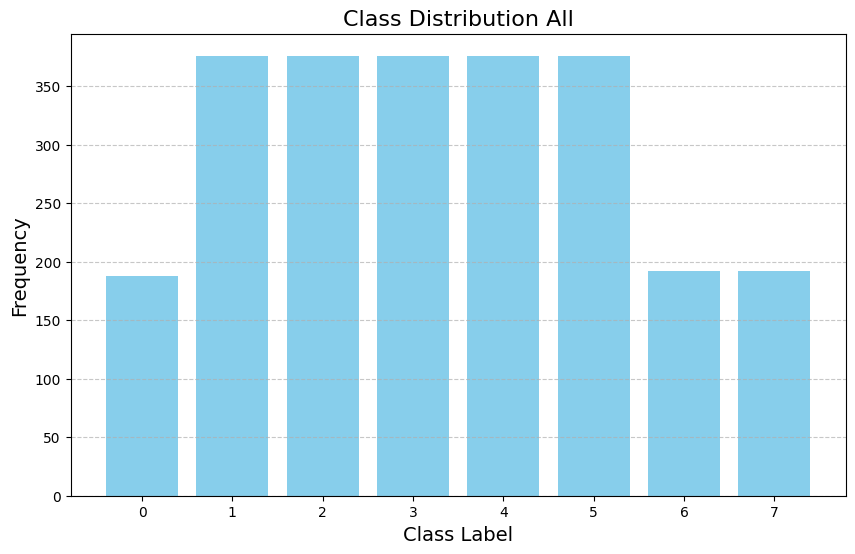

In [27]:
from collections import Counter

def calculate_class_distribution(jsonl_path):
    """
    Calculate the class distribution from a JSONL file.

    Parameters:
    jsonl_path (str): Path to the JSONL file.

    Returns:
    dict: A dictionary with class labels as keys and their counts as values.
    """
    class_counts = Counter()
    with open(jsonl_path, 'r') as f:
        for line in f:
            entry = json.loads(line)
            class_counts[entry['label']] += 1
    return dict(class_counts)

# Calculate and display the class distribution
class_distribution = calculate_class_distribution('/home/varaudio/Thang/emotion_recognition/src/preprocess/metadata/all_ravdess_data.jsonl')
print("Class Distribution all:", class_distribution)

# Plot the class distribution as a histogram
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title('Class Distribution All', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Class Distribution all: {4: 184, 0: 92, 3: 184, 5: 184, 2: 184, 1: 184}


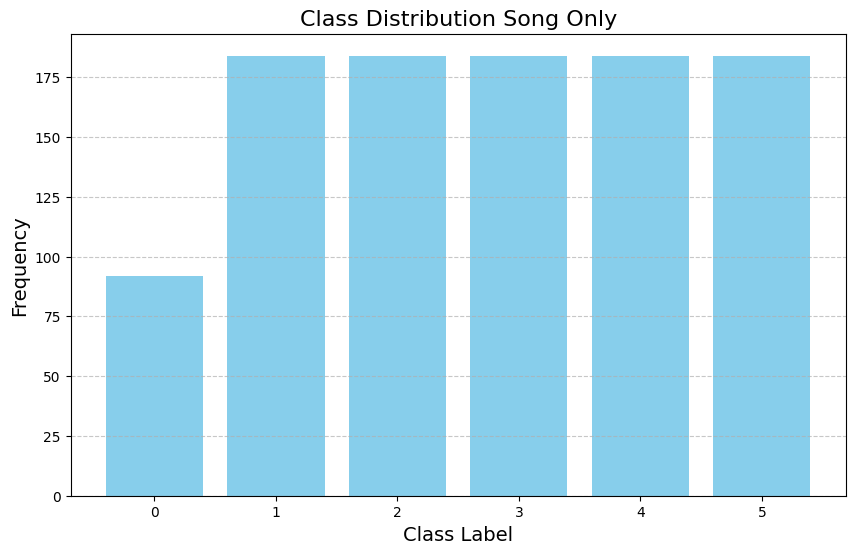

In [29]:
class_distribution = calculate_class_distribution('/home/varaudio/Thang/emotion_recognition/src/preprocess/metadata/song_ravdess_data.jsonl')
print("Class Distribution all:", class_distribution)

# Plot the class distribution as a histogram
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title('Class Distribution Song Only', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Class Distribution Speech only: {5: 192, 2: 192, 6: 192, 3: 192, 1: 192, 4: 192, 0: 96, 7: 192}


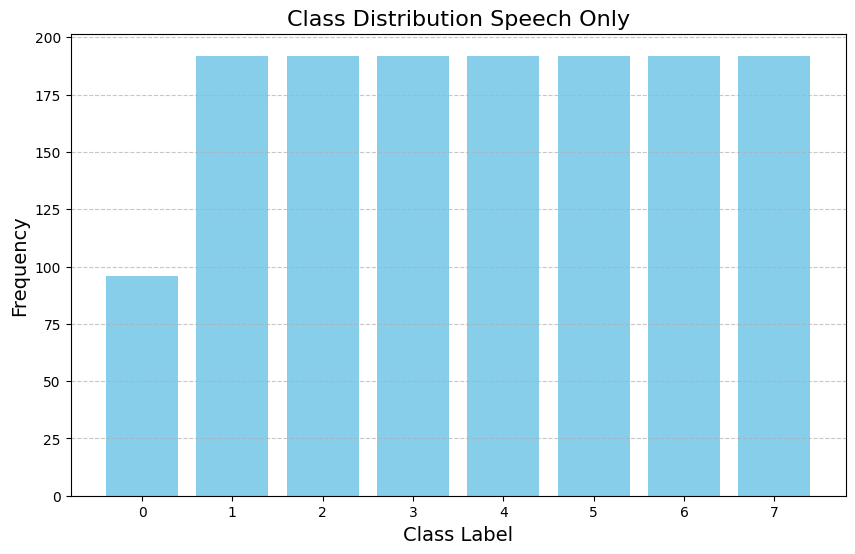

In [30]:
class_distribution = calculate_class_distribution('/home/varaudio/Thang/emotion_recognition/src/preprocess/metadata/speech_ravdess_data.jsonl')
print("Class Distribution Speech only:", class_distribution)

# Plot the class distribution as a histogram
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title('Class Distribution Speech Only', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()